# Modeling on sarcasm dataset

## Loading data

In [14]:
from json import load

with open('./ungraded_labs/sarcasm.json') as file:
    data = load(file)
    print(len(data))
    print(data[:10])

26709
[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}, {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365', 'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse", 'is_sarcastic': 0}, {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697', 'headline': "mom starting to fear son's web series closest thing she will have to grandchild", 'is_sarcastic': 1}, {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302', 'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'is_sarcastic': 1}, {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-ha

## Data preprocessing

In [47]:
from random import shuffle

shuffle(data)

dataset = [obj['headline'] for obj in data]
labels = [obj['is_sarcastic'] for obj in data]

training_size = int(0.8 * len(dataset))
training_data = dataset[:training_size]
training_labels = labels[:training_size]
validation_data = dataset[training_size:]
validation_labels = labels[training_size:]

print(len(training_data))
print(len(validation_data))

21367
5342


In [48]:
print(dataset[:10])
print(labels[:10])

["amsterdam tourist can't find 'kind bud' in phrasebook", 'pile of crap excites publicist', '12 movies for the next 12 months', 'football fan wears off-season body paint', "france's prime minister knows what's in a name", 'swollen rex tillerson spotted rushing to place mouth over leaks spouting in keystone pipeline', "someone spotted a new pixar easter egg from 'the good dinosaur'", 'area man coasting by on good looks, work ethic, in-depth knowledge of virginia real estate law', 'breaking: still nothing', 'martha raddatz was the mvp of that horrifying debate']
[1, 1, 0, 1, 0, 1, 0, 1, 1, 0]


## Encoding Dataset

Hyperparameters

In [144]:
vocab_size = 4096
sntnc_max_len = 32
epochs = 20
oov_tok = '<OOV>'
pad_order = 'pre'
trunc_order = 'post'
embedding_dim = 16

In [145]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Creating vocabulary from the training dataset
tokenizer.fit_on_texts(training_data)
print(len(tokenizer.word_index.keys()))

# Padding both training & validation sequences
train_seqs = tokenizer.texts_to_sequences(training_data)
val_seqs = tokenizer.texts_to_sequences(validation_data)

pad_train_seqs = pad_sequences(train_seqs, padding=pad_order, truncating=trunc_order, maxlen=sntnc_max_len)
pad_val_seqs = pad_sequences(val_seqs, padding=pad_order, truncating=trunc_order, maxlen=sntnc_max_len)


26539


In [146]:
import numpy as np

training_labels = np.array(training_labels)
validation_labels = np.array(validation_labels)

## Declaring Model

In [147]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=sntnc_max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 32, 16)            65536     
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
 1 (GlobalAveragePooling1D)                                      
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 65681 (256.57 KB)
Trainable params: 65681 (256.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Model Training

In [149]:
hist_data = model.fit(pad_train_seqs, training_labels, validation_data=(pad_val_seqs, validation_labels), epochs=epochs)

Epoch 1/20
668/668 [==============================] - 1s 869us/step - loss: 0.5919 - accuracy: 0.6804 - val_loss: 0.4342 - val_accuracy: 0.8184
Epoch 2/20
668/668 [==============================] - 0s 704us/step - loss: 0.3582 - accuracy: 0.8537 - val_loss: 0.3551 - val_accuracy: 0.8437
Epoch 3/20
668/668 [==============================] - 0s 690us/step - loss: 0.2962 - accuracy: 0.8777 - val_loss: 0.3448 - val_accuracy: 0.8474
Epoch 4/20
668/668 [==============================] - 0s 713us/step - loss: 0.2674 - accuracy: 0.8896 - val_loss: 0.3549 - val_accuracy: 0.8413
Epoch 5/20
668/668 [==============================] - 0s 721us/step - loss: 0.2490 - accuracy: 0.8966 - val_loss: 0.3563 - val_accuracy: 0.8459
Epoch 6/20
668/668 [==============================] - 0s 672us/step - loss: 0.2376 - accuracy: 0.9016 - val_loss: 0.3649 - val_accuracy: 0.8459
Epoch 7/20
668/668 [==============================] - 0s 685us/step - loss: 0.2274 - accuracy: 0.9060 - val_loss: 0.3803 - val_accuracy:

## Plotting metrics

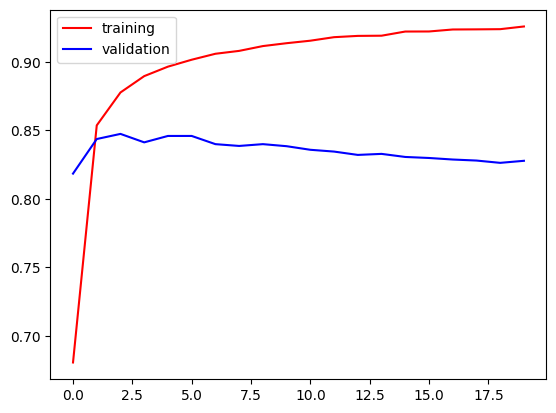

In [150]:
import matplotlib.pyplot as plt

plt.plot(hist_data.history['accuracy'], 'r', label='training')
plt.plot(hist_data.history['val_accuracy'], 'b', label='validation')
plt.legend()
plt.show()

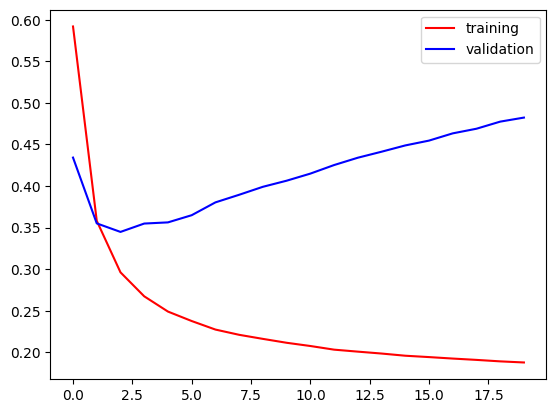

In [151]:
plt.plot(hist_data.history['loss'], 'r', label='training')
plt.plot(hist_data.history['val_loss'], 'b', label='validation')
plt.legend()
plt.show()

## Predicting on random sentence

In [1]:
random_sentence = 'dad accidently opens while fixing sink'
random_sequence = tokenizer.texts_to_sequences([random_sentence])
pad_random_sequence = pad_sequences(random_sequence, padding=pad_order, truncating=trunc_order, maxlen=sntnc_max_len)
output_class = model.predict(pad_random_sequence)

print(output_class)
if output_class[0] > 0.5:
    print('Sarcasm')
else:
    print('Not sarcasm')

NameError: name 'tokenizer' is not defined

## Saving this model for future use

In [169]:
# model.save('sarcasm_detector.keras')

In [170]:
from tensorflow.keras.models import load_model
saved_model = load_model('sarcasm_detector.keras')
print(saved_model.predict(pad_random_sequence))

1/1 [==============================] - 0s 29ms/step
[[0.73296183]]
